# Introduction 

To learn about the data, please visit the website : http://www.cs.toronto.edu/~delve/data/adult/adultDetail.html

We have a set of data/features that describe a person. We need to figure out the salary of the person.

The objective of the assignment is to help the IRS, Internal Revenue Service, Find out people who might show lesser income than their actual income. (Superficaial, Building a usecase to beter navigate the ROC curve when the time comes)

The task is to predict if an individual's annual income excceds $50,000 based on census data

# Contents Table

Overview Of the Notebook

1. <a href='#EDA'>Exploratory Data Analysis</a>
    1. <a href='#EDA'>Visualizing Target Variable</a>
    1. <a href='#VCDU'>Visualizing Categorical Variable</a>
        1. <a href='#VCDU'>Univariate Analysis of Categorical Data</a> 
        1. <a href='#VCDB'>Bivariate Analysis of Categorical Data</a>
    1. <a href='#VCV'>Visualizign Continuous Variable</a>   
1. <a href='#M'>Modelling</a>
    1. <a href='#SVM'>Support Vector Machine Principals - Linear SVC</a>
    1. <a href='#RF'>Tree Principals</a>
        1. <a href='#FR'>Bagging - Random Forest </a>
        1. <a href='#XGB'>Boosting - XGBoost</a>
            1. <a href='#XGBB'>XGBoosting after balancing the dataset </a>
            1. <a href='#XBGH'>XGBoost : Parameter Tuning</a>
            1. <a href='#XGBFE'>XGBoost : Feature Selection & Feature Importance</a>
1. <a href='#CON'>Conclusion</a>


In [2]:
import pandas as pd
import numpy as np 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('adult/Dataset.data',delimiter=' ',header=None)
df.columns = ['age', 'work_class', 'fnlwgt', 'education', 'educational_num', 'marital_status',
               'occupation','relationship','race','gender','capital_gain','capital_loss',
               'hours_per_week','native_country','income']

In [4]:
df1 = df.copy()

#### Checking the data points 

In [5]:
df1

,age,work_class,fnlwgt,education,educational_num,marital_status,occupation,relationship,race,gender,capital_gain,capital_loss,hours_per_week,native_country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   work_class       48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational_num  48842 non-null  int64 
 5   marital_status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital_gain     48842 non-null  int64 
 11  capital_loss     48842 non-null  int64 
 12  hours_per_week   48842 non-null  int64 
 13  native_country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


So null values are not directly accessable, it will be either ? or 999 or we need to check

In [7]:
cont = df1.describe().columns
df1.describe()

,age,fnlwgt,educational_num,capital_gain,capital_loss,hours_per_week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [8]:
cat = df1.describe(include='object').columns
df1.describe(include='object')

,work_class,education,marital_status,occupation,relationship,race,gender,native_country,income
count,48842,48842,48842,48842,48842,48842,48842,48842,48842
unique,9,16,7,15,6,5,2,42,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,33906,15784,22379,6172,19716,41762,32650,43832,37155


#### It is given that the missing values are in the following features. Lets consider them as a seperate category

I always prefer taking the missing value, htat way we do not have information loss

Lets replace the work_class with the mode, since if it was in the public sector we would have the records
The missing value indicates it is not public sector job, other categories are very less summing upto 2000

**"Good Methods add information, Bad Mehtods exagerate information," S.Anand, CEO Gramener.**

In [9]:
df1.work_class = df1.work_class.replace('?',df1.work_class.mode()[0]) 
df1.occupation = df1.occupation.replace('?','Uknown')
df1.native_country = df1.native_country.replace('?','Unknown')

In [10]:
df1.shape

(48842, 15)

## Exploratory Data Analysis
<a id='EDA'></a>

### Visualizing the Target Variable

In [11]:
df1.income = df1.income.replace('<=50K',0)
df1.income = df1.income.replace('>50K',1)

In [12]:
ratio = {'income<50K':[round(df1[df1.income==0].shape[0]/df1.shape[0]*100,2)],'income>50K':[round(df1[df1.income==1].shape[0]/df1.shape[0]*100,2)],}
pd.DataFrame(ratio)

,income<50K,income>50K
0,76.07,23.93


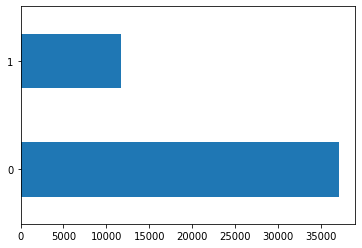

In [13]:
df1.income.value_counts().plot(kind='barh')
plt.show()


### Visualizing Categorical Data


#### Univariate Analysis of Categorical Variable

##### Work Class

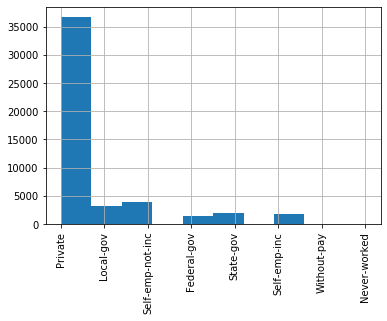

In [14]:
df1.work_class.hist()
plt.xticks(rotation=90)
plt.show()

A lot of people work in the private sector

##### Education

* We have been given the data, types in a file,

* They have left us the option to choose the whether we want to consider education as a ordinal variable or not.

* So I will consider it ordinal and check for correlation. If it is good then we shall consider it ordinal. 

In [15]:
df1.education = df1.education.map({'HS-grad':11,
'Some-college': 9,
'Bachelors': 10,      
'Masters':  12,        
'Assoc-voc':13,       
'11th': 7,            
'Assoc-acdm': 14,     
'10th': 6,            
'7th-8th':4,     
'Prof-school':  16 ,  
'9th': 5,          
'12th': 8,       
'Doctorate': 15,     
'5th-6th':3,
'1st-4th':2,
'Preschool':1})

In [16]:
df1[['education','income']].corr()

,education,income
education,1.000000,0.209602
income,0.209602,1.000000


Conclusion : We shall keep it nominial

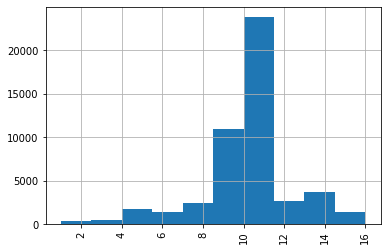

In [17]:
df1.education.hist()
plt.xticks(rotation=90)
plt.show()

In [18]:
plot_table = pd.DataFrame(df1.education.value_counts())
plot_table.reset_index(inplace=True)
plot_table

,index,education
0,11,15784
1,9,10878
2,10,8025
3,12,2657
4,13,2061
5,7,1812
6,14,1601
7,6,1389
8,4,955
9,16,834


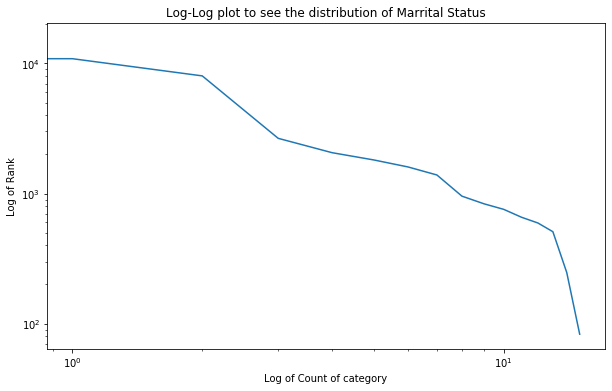

In [19]:
plt.figure(figsize=(10,6))
plt.title('Log-Log plot to see the distribution of Marrital Status')
plt.loglog(plot_table.index,plot_table.education)
plt.xlabel('Log of Count of category')
plt.ylabel('Log of Rank')
plt.show()

In [20]:
df1.education=df.education

##### Marital Status

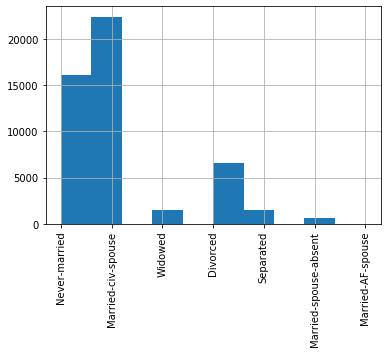

In [21]:
df1.marital_status.hist()
plt.xticks(rotation=90)
plt.show()

In [22]:
plot_table = pd.DataFrame(df1.marital_status.value_counts())
plot_table.reset_index(inplace=True)
plot_table

,index,marital_status
0,Married-civ-spouse,22379
1,Never-married,16117
2,Divorced,6633
3,Separated,1530
4,Widowed,1518
5,Married-spouse-absent,628
6,Married-AF-spouse,37


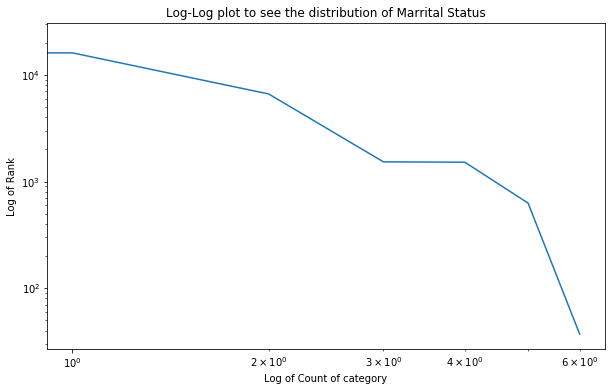

In [23]:
plt.figure(figsize=(10,6))
plt.title('Log-Log plot to see the distribution of Marrital Status')
plt.loglog(plot_table.index,plot_table.marital_status)
plt.xlabel('Log of Count of category')
plt.ylabel('Log of Rank')
plt.show()

What we observe is that the last two variables, 
* absent spouse 
* Married AF spouse 
is an abnormality, 

A good power law exists 

##### Occupation

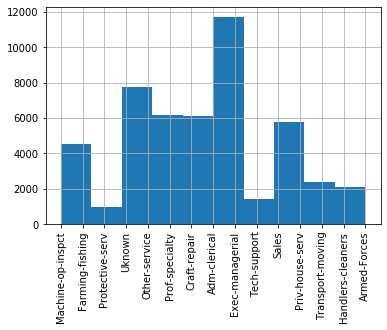

In [24]:
df1.occupation.hist()
plt.xticks(rotation=90)
plt.show()

##### Relationship

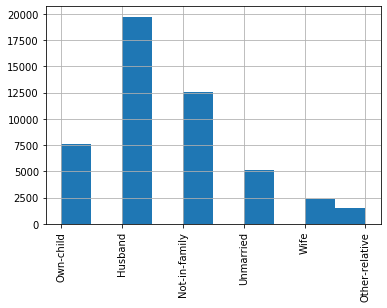

In [25]:
df1.relationship.hist()
plt.xticks(rotation=90)
plt.show()

In [26]:
plot_table = pd.DataFrame(df1.relationship.value_counts())
plot_table.reset_index(inplace=True)
plot_table

,index,relationship
0,Husband,19716
1,Not-in-family,12583
2,Own-child,7581
3,Unmarried,5125
4,Wife,2331
5,Other-relative,1506


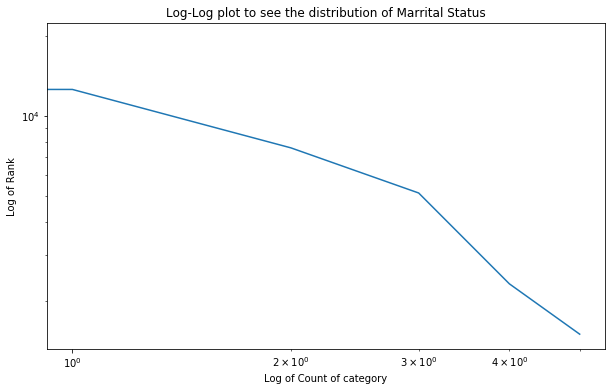

In [27]:
plt.figure(figsize=(10,6))
plt.title('Log-Log plot to see the distribution of Marrital Status')
plt.loglog(plot_table.index,plot_table.relationship)
plt.xlabel('Log of Count of category')
plt.ylabel('Log of Rank')
plt.show()

##### Race

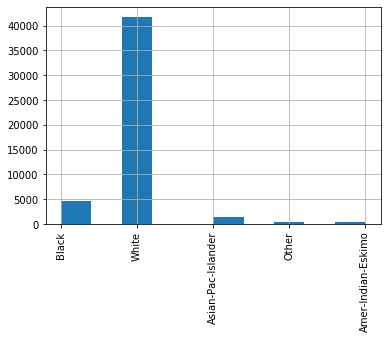

In [28]:
df1.race.hist()
plt.xticks(rotation=90)
plt.show()

In [29]:
plot_table = pd.DataFrame(df1.race.value_counts())
plot_table.reset_index(inplace=True)
plot_table

,index,race
0,White,41762
1,Black,4685
2,Asian-Pac-Islander,1519
3,Amer-Indian-Eskimo,470
4,Other,406


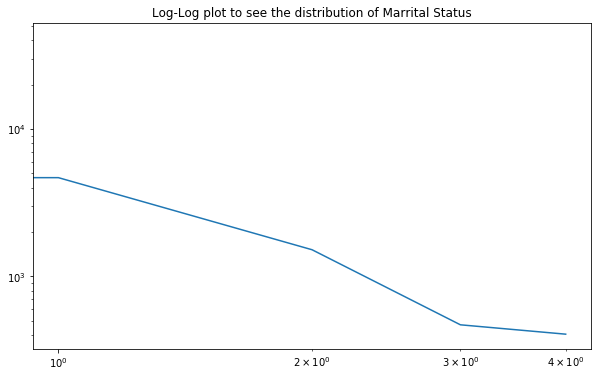

In [30]:
plt.figure(figsize=(10,6))
plt.title('Log-Log plot to see the distribution of Marrital Status')
plt.loglog(plot_table.index,plot_table.race)
plt.show()

##### Gender

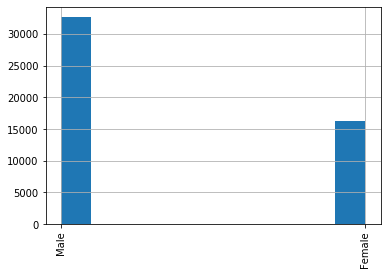

In [31]:
df1.gender.hist()
plt.xticks(rotation=90)
plt.show()

In [32]:
plot_table = pd.DataFrame(df1.gender.value_counts())
plot_table.reset_index(inplace=True)
plot_table

,index,gender
0,Male,32650
1,Female,16192


##### Native Country

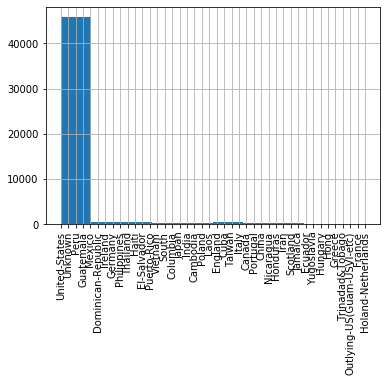

In [33]:
df1.native_country.hist()
plt.xticks(rotation=90)
plt.show()

<a id='VCDB'></a>
#### Bi-variate Analysis of Categorical Variables


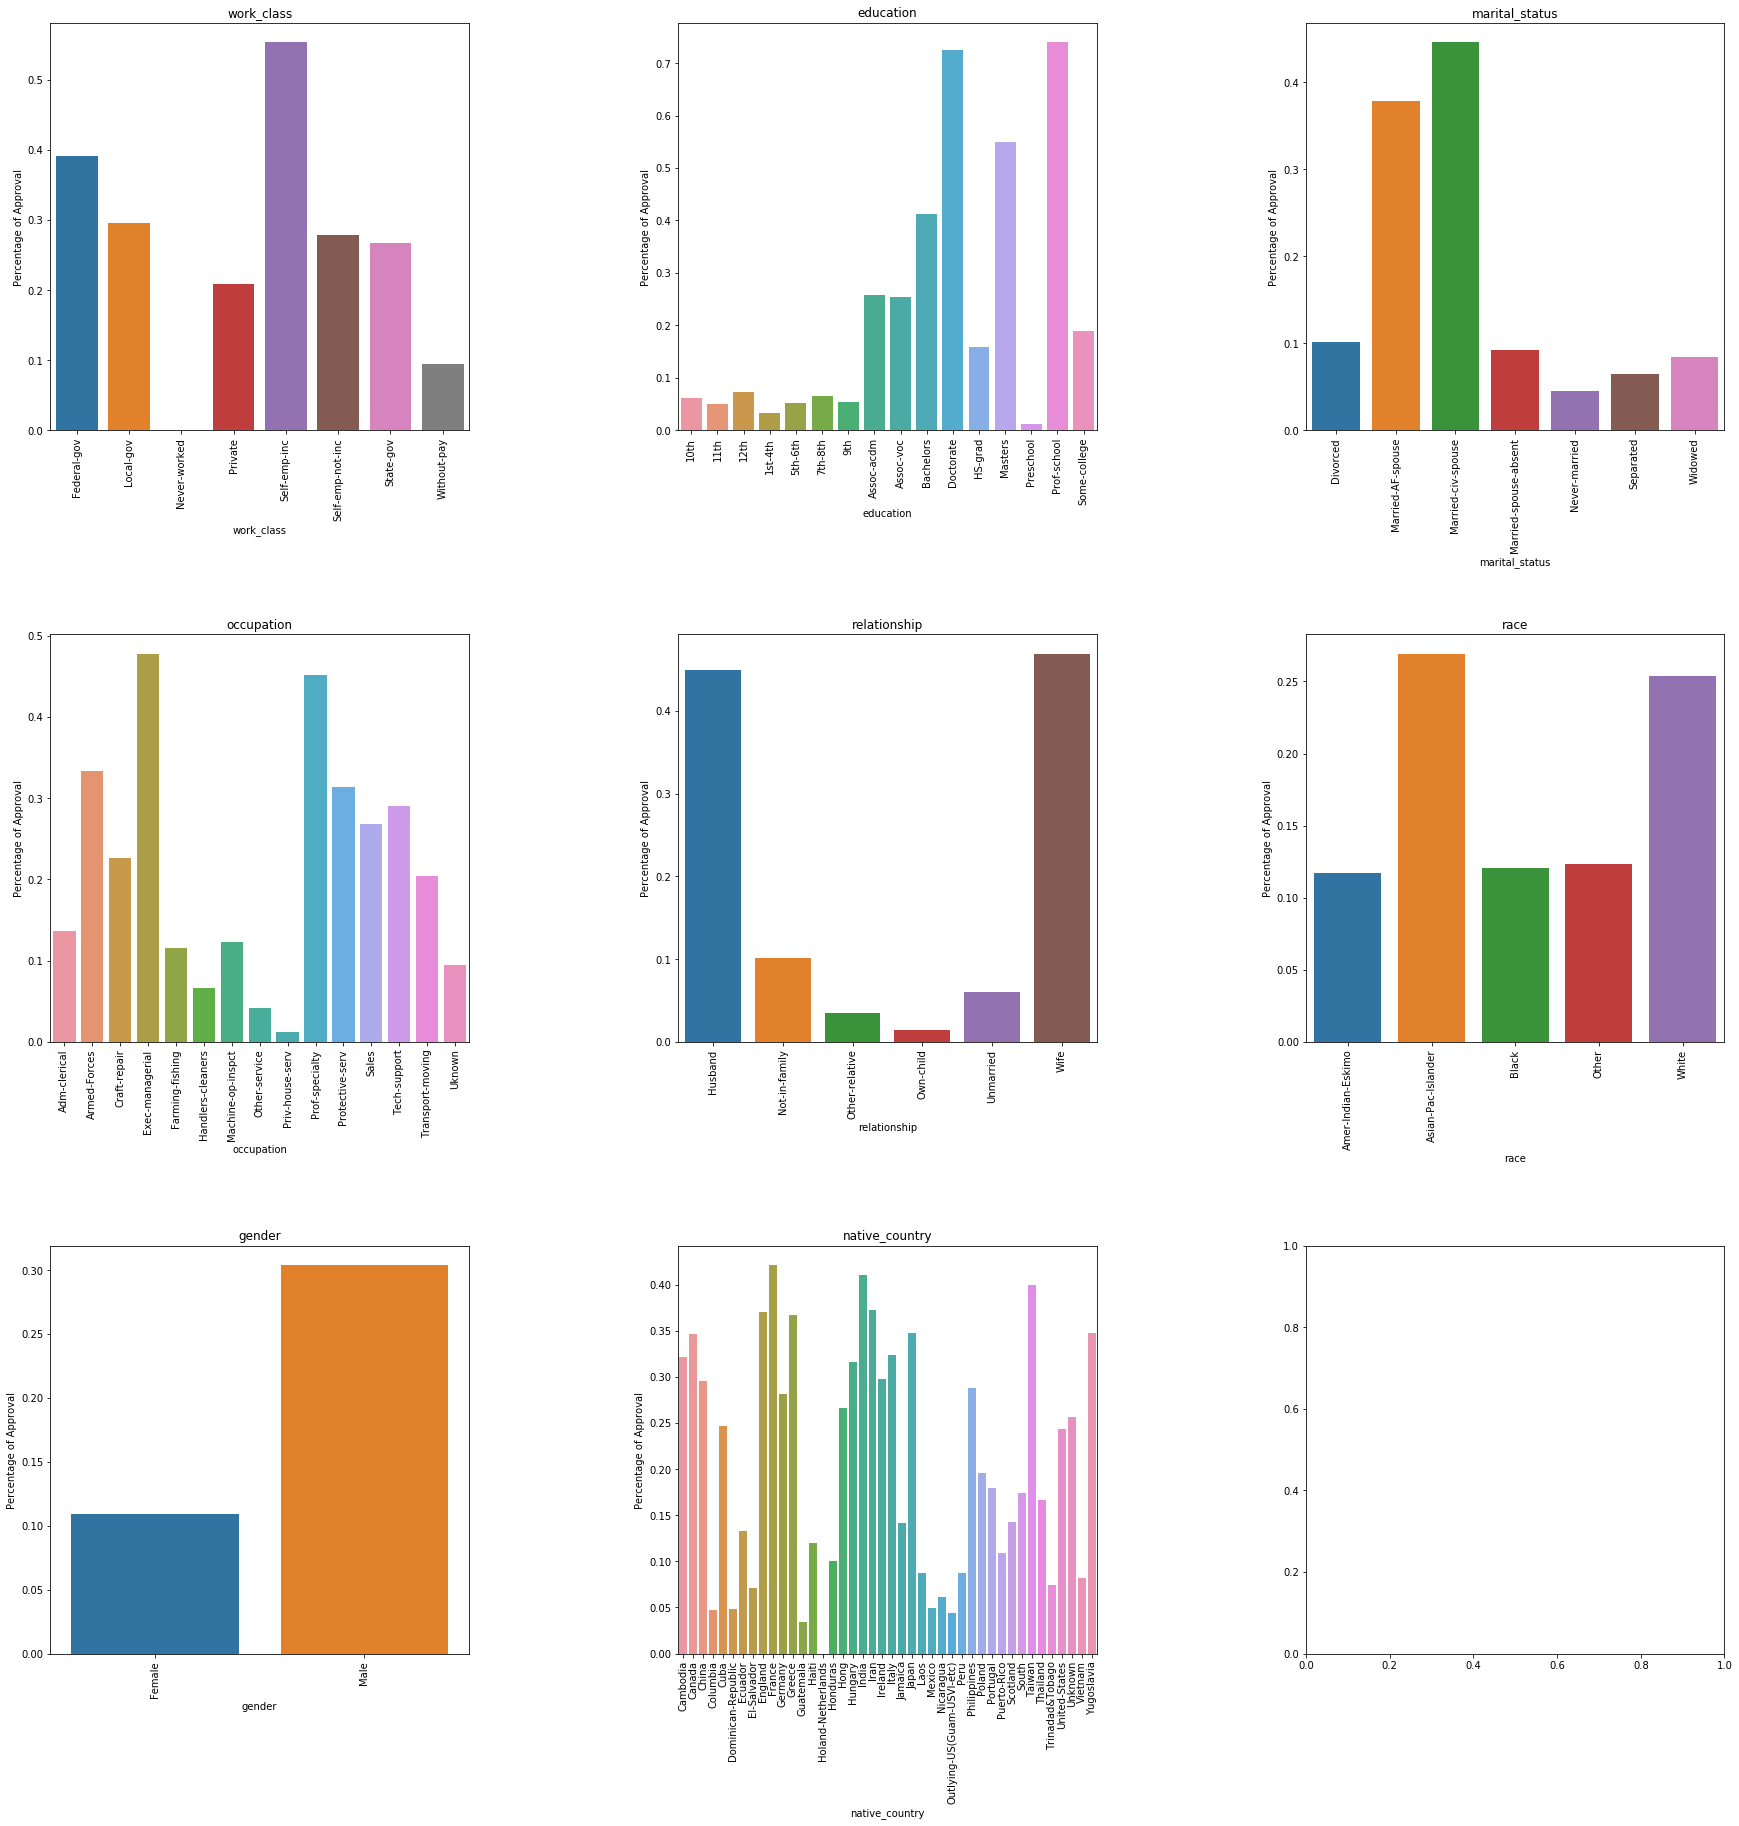

In [34]:
fig, axs = plt.subplots(3,3,figsize=(30,30))
fig.subplots_adjust(hspace = .5, wspace=.5)
axs = axs.ravel()
counter=0

for i in cat[:-1]:
    
    df1_pivot = df1[[i,'income']]
    df1_plot = pd.pivot_table(df1_pivot,'income',i)
#     print(df1_plot) #for debugging
    
    axs[counter].set_title(i)
    sns.barplot(df1_plot.index,'income',data=df1_plot,ax=axs[counter])
    axs[counter].set_ylabel("Percentage of Approval")
    axs[counter].set_xticklabels(df1_plot.index,rotation=90)
    counter+=1   

Amazing Categorical Variables, We can easily segrigation between the categories that have 

Education is a primary driver.

<a id='VCV'></a>
### Visualizing Continuous Variable

In [35]:
df_cont = df1[cont]
df_cont['income'] = df1['income']

C:\Users\samla\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


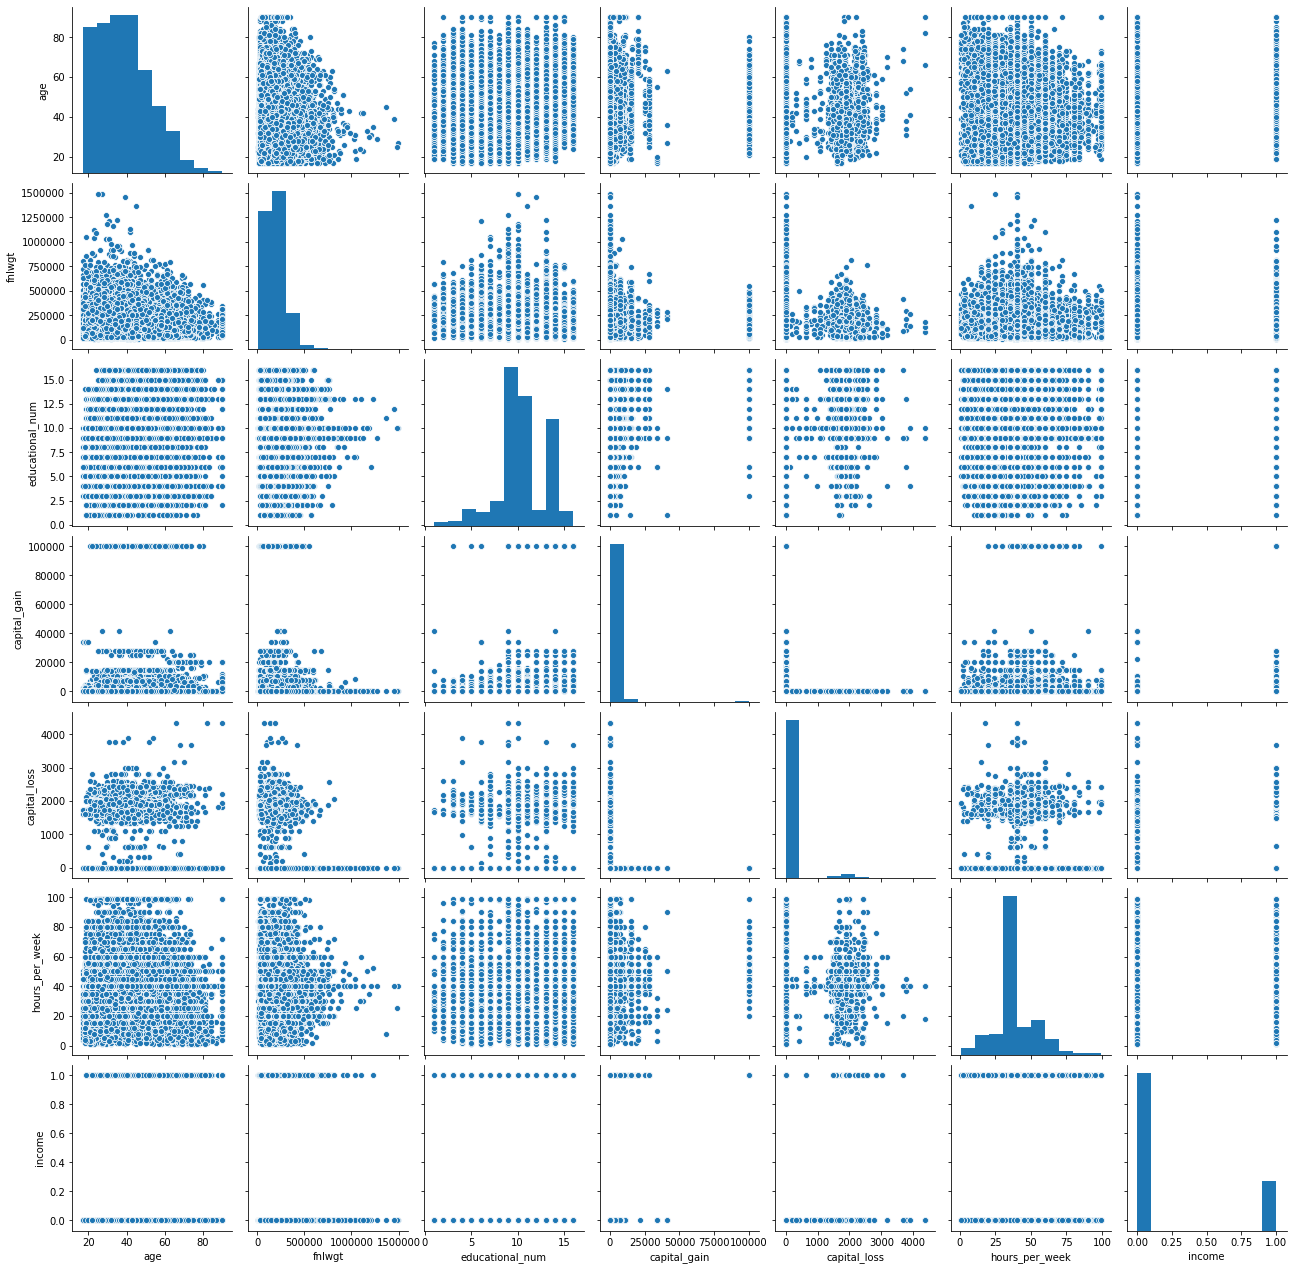

In [36]:
sns.pairplot(df_cont)
plt.show()

In [37]:
corr_matrix = df_cont.corr()

In [38]:
mask = np.zeros_like(corr_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)]= True

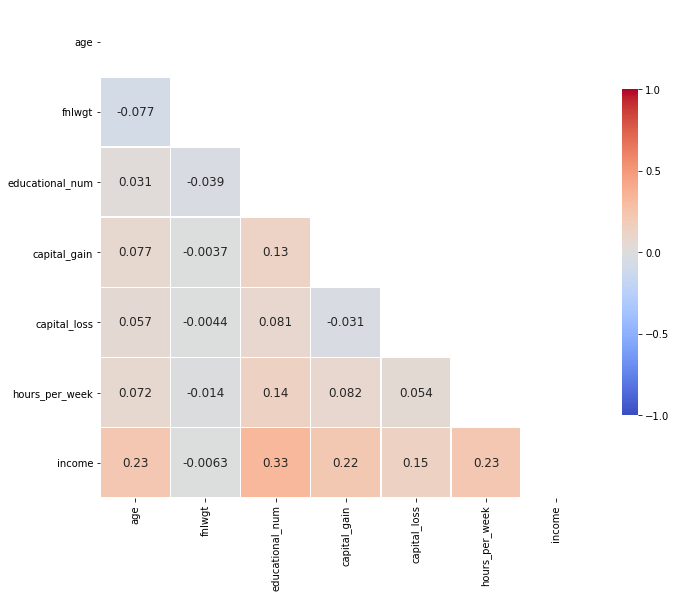

In [39]:
f, ax = plt.subplots(figsize=(11, 15)) 
heatmap = sns.heatmap(corr_matrix, 
                      mask = mask,
                      square = True,
                      linewidths = .5,
                      cmap = 'coolwarm',
                      cbar_kws = {'shrink': .4, 
                                'ticks' : [-1, -.5, 0, 0.5, 1]},
                      vmin = -1, 
                      vmax = 1,
                      annot = True,
                      annot_kws = {'size': 12})
#add the column names as labels
ax.set_yticklabels(corr_matrix.columns, rotation = 0)
ax.set_xticklabels(corr_matrix.columns)
sns.set_style({'xtick.bottom': True}, {'ytick.left': True})

Lets edit age distribution using logs... 

In [40]:
df_cont.age = np.log(df_cont.age)

C:\Users\samla\anaconda3\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [41]:
df_cont[['age','income']].corr()

,age,income
age,1.000000,0.265934
income,0.265934,1.000000


Slight increase

**Lets check correlation categorical Variable :**

In [42]:
df_cat = df1[cat]

In [43]:
corr_matrix = pd.get_dummies(df_cat).corr()

In [44]:
mask = np.zeros_like(corr_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)]= True

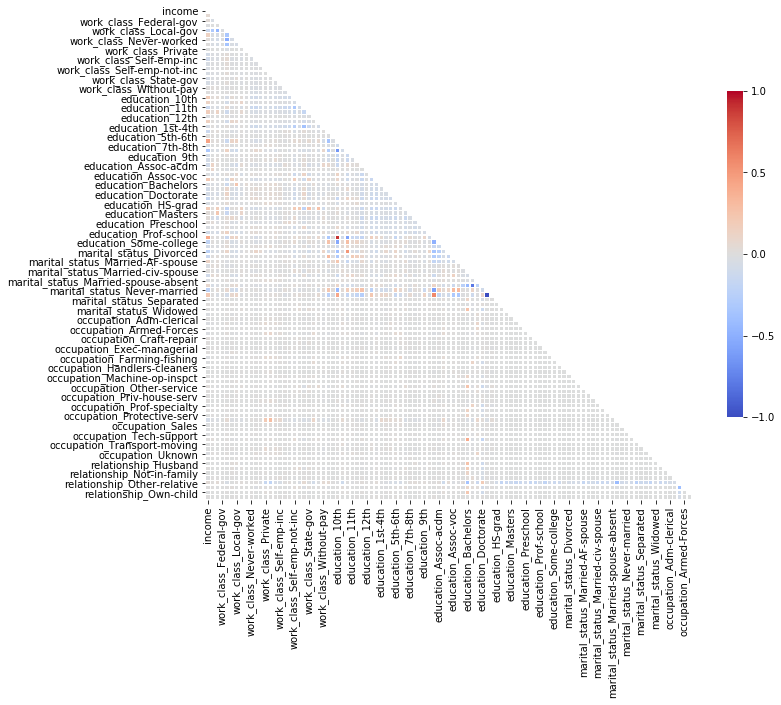

In [45]:
f, ax = plt.subplots(figsize=(11, 15)) 
heatmap = sns.heatmap(corr_matrix, 
                      mask = mask,
                      square = True,
                      linewidths = .5,
                      cmap = 'coolwarm',
                      cbar_kws = {'shrink': .4, 
                                'ticks' : [-1, -.5, 0, 0.5, 1]},
                      vmin = -1, 
                      vmax = 1,
                      annot = False,
                      annot_kws = {'size': 12})
#add the column names as labels
ax.set_yticklabels(corr_matrix.columns, rotation = 0)
ax.set_xticklabels(corr_matrix.columns)
sns.set_style({'xtick.bottom': True}, {'ytick.left': True})

**Conslusion**

Linear Model makes no sense here -> logistic doesnt.

We have to use Decision Tree. 


<a id='M'></a>
## Modeling

In [46]:
df1.age = np.log(df1.age)

In [47]:
df1 = pd.get_dummies(df1)

In [48]:
from sklearn.model_selection import train_test_split

X = df1.drop('income',axis=1)
y = df1[['income']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)


<a id='SVM'></a>
### Linear SVC

In [49]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [50]:
from sklearn.svm import LinearSVC

lsvc = LinearSVC(max_iter=4000)
lsvc.fit(X_train,y_train)

y_pred = lsvc.predict(X_test)

accuracy_score(y_test,lsvc.predict(X_test))

C:\Users\samla\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\samla\anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.538792221084954

Test Data Accuracy: 0.5388


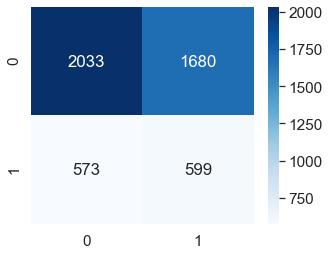

In [51]:
# Confusion Matrix

cm = confusion_matrix(y_test, y_pred) # rows = truth, cols = prediction
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))

plt.figure(figsize = (5,4))
sns.set(font_scale=1.4)

sns.heatmap(df_cm, annot=True, fmt='g', cmap="Blues")
print("Test Data Accuracy: %0.4f" % accuracy_score(y_test, y_pred))

In [52]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.55      0.64      3713
           1       0.26      0.51      0.35      1172

    accuracy                           0.54      4885
   macro avg       0.52      0.53      0.50      4885
weighted avg       0.66      0.54      0.57      4885




<a id='RF'></a>
### Random Forest 

In [53]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(oob_score=True)
rf.fit(X_train,y_train)

y_pred = rf.predict(X_test)

accuracy_score(y_test,rf.predict(X_test))

C:\Users\samla\anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


0.858546571136131

Test Data Accuracy: 0.8585


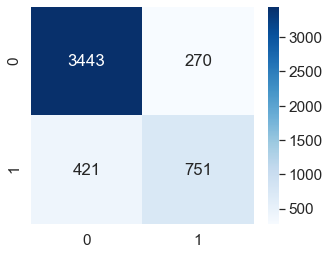

In [54]:
# Confusion Matrix

cm = confusion_matrix(y_test, y_pred) # rows = truth, cols = prediction
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))

plt.figure(figsize = (5,4))
sns.set(font_scale=1.4)

sns.heatmap(df_cm, annot=True, fmt='g', cmap="Blues")
print("Test Data Accuracy: %0.4f" % accuracy_score(y_test, y_pred))

In [55]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.93      0.91      3713
           1       0.74      0.64      0.68      1172

    accuracy                           0.86      4885
   macro avg       0.81      0.78      0.80      4885
weighted avg       0.85      0.86      0.86      4885



#### Inference 1 :

* By seeing the Correlation Matrix of the Data, intuition was built that linear model would not be useful.
* We can observe the Random Forest is Getting a better result
* We concluded as the continuous parameters didnt show very high correlation
* But on the other hand categorical data, showed cetrain categories with high % of 1s and others with low % of ones. This was bound to be reflected better in Random forest than Linear Classification. 
* If the data would have had High Correlation with continuous Variable then linear would have better results


<a id='XGB'></a>
### XGBoost 

In [56]:
from xgboost import XGBClassifier

xgb = XGBClassifier()
xgb.fit(X_train,y_train)

y_pred = xgb.predict(X_test)

accuracy_score(y_test,xgb.predict(X_test))

C:\Users\samla\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


0.8759467758444217

Test Data Accuracy: 0.8759


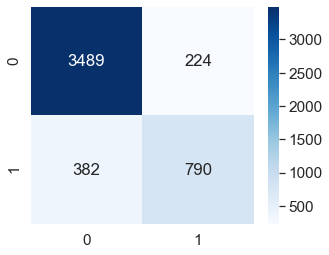

In [57]:
# Confusion Matrix

cm = confusion_matrix(y_test, y_pred) # rows = truth, cols = prediction
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))

plt.figure(figsize = (5,4))
sns.set(font_scale=1.4)

sns.heatmap(df_cm, annot=True, fmt='g', cmap="Blues")
print("Test Data Accuracy: %0.4f" % accuracy_score(y_test, y_pred))

In [58]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.94      0.92      3713
           1       0.78      0.67      0.72      1172

    accuracy                           0.88      4885
   macro avg       0.84      0.81      0.82      4885
weighted avg       0.87      0.88      0.87      4885



<a id='XGBB'></a>
### XGBoosting after balancing the dataset 
Using RandomUnderSampler to balance the data / undersample

In [59]:
from imblearn.under_sampling import RandomUnderSampler

under = RandomUnderSampler(sampling_strategy=0.5)

X_train_under, y_train_under = under.fit_resample(X_train, y_train)

In [60]:
y_train_under.income.value_counts()

0    21030
1    10515
Name: income, dtype: int64

In [61]:
from xgboost import XGBClassifier

xgb = XGBClassifier()
xgb.fit(X_train_under,y_train_under)
y_pred = xgb.predict(X_test)

print('Accuracy of logistic regression classifier on test set: {:.5f}'.format(xgb.score(X_test, y_test)))

C:\Users\samla\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Accuracy of logistic regression classifier on test set: 0.86919


Test Data Accuracy: 0.8692


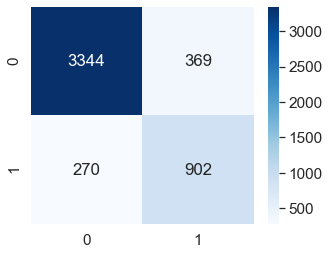

In [62]:
# Confusion Matrix

cm = confusion_matrix(y_test, y_pred) # rows = truth, cols = prediction
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))

plt.figure(figsize = (5,4))
sns.set(font_scale=1.4)

sns.heatmap(df_cm, annot=True, fmt='g', cmap="Blues")
print("Test Data Accuracy: %0.4f" % accuracy_score(y_test, y_pred))

In [63]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.90      0.91      3713
           1       0.71      0.77      0.74      1172

    accuracy                           0.87      4885
   macro avg       0.82      0.84      0.83      4885
weighted avg       0.87      0.87      0.87      4885



#### Inference 2: 

* We Observe that with a slight compromize in the overall accuracy we have increased the recall. 
* Primaryly I took a business use case so that I could parameter tune better 

<a id='XGBH'></a>
### XGBoost : Parameter Tuning

In [64]:
params={
    'learning_rate':[0,0.5,0.10,0.15,0.20,.25,0.30],
    'max_depth':[3,4,5,6,8,10,13],
    'min_child_weight':[1,3,5,7],
    'gamma':[0.0,0.1,0.2,0.3,0.4],
    'colsample_bytree':[0.3,0.4,0.5,0.7],
}

In [65]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

xgb = XGBClassifier()
random_search=RandomizedSearchCV(xgb,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)

In [66]:
random_search.fit(X_train_under,y_train_under)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  19 out of  25 | elapsed:   53.5s remaining:   16.8s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:  1.1min finished
C:\Users\samla\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100,...
                                           reg_lambda=None,
                                           scale_pos_weight=None,
                                           subsample=No

In [67]:
random_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.4, gamma=0.4, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.2, max_delta_step=0, max_depth=5,
              min_child_weight=7, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [68]:
random_search.best_params_

{'min_child_weight': 7,
 'max_depth': 5,
 'learning_rate': 0.2,
 'gamma': 0.4,
 'colsample_bytree': 0.4}

In [150]:
from sklearn.model_selection import cross_val_score

xgb = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0.0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.25, max_delta_step=0, max_depth=10,
              min_child_weight=3, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

xgb.fit(X_train_under,y_train_under)
y_pred = xgb.predict(X_test)

score=cross_val_score(xgb,X_test,y_test,cv=10)
print(score.mean())


C:\Users\samla\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


0.8579297830969862


Test Data Accuracy: 0.8704


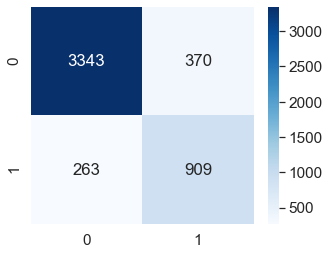

In [151]:
# Confusion Matrix

cm = confusion_matrix(y_test, y_pred) # rows = truth, cols = prediction
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))

plt.figure(figsize = (5,4))
sns.set(font_scale=1.4)

sns.heatmap(df_cm, annot=True, fmt='g', cmap="Blues")
print("Test Data Accuracy: %0.4f" % accuracy_score(y_test, y_pred))

In [152]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.90      0.91      3713
           1       0.71      0.78      0.74      1172

    accuracy                           0.87      4885
   macro avg       0.82      0.84      0.83      4885
weighted avg       0.88      0.87      0.87      4885



<a id='XBGFE'></a>
### XGBoost : Feature Selection & Feature Importance

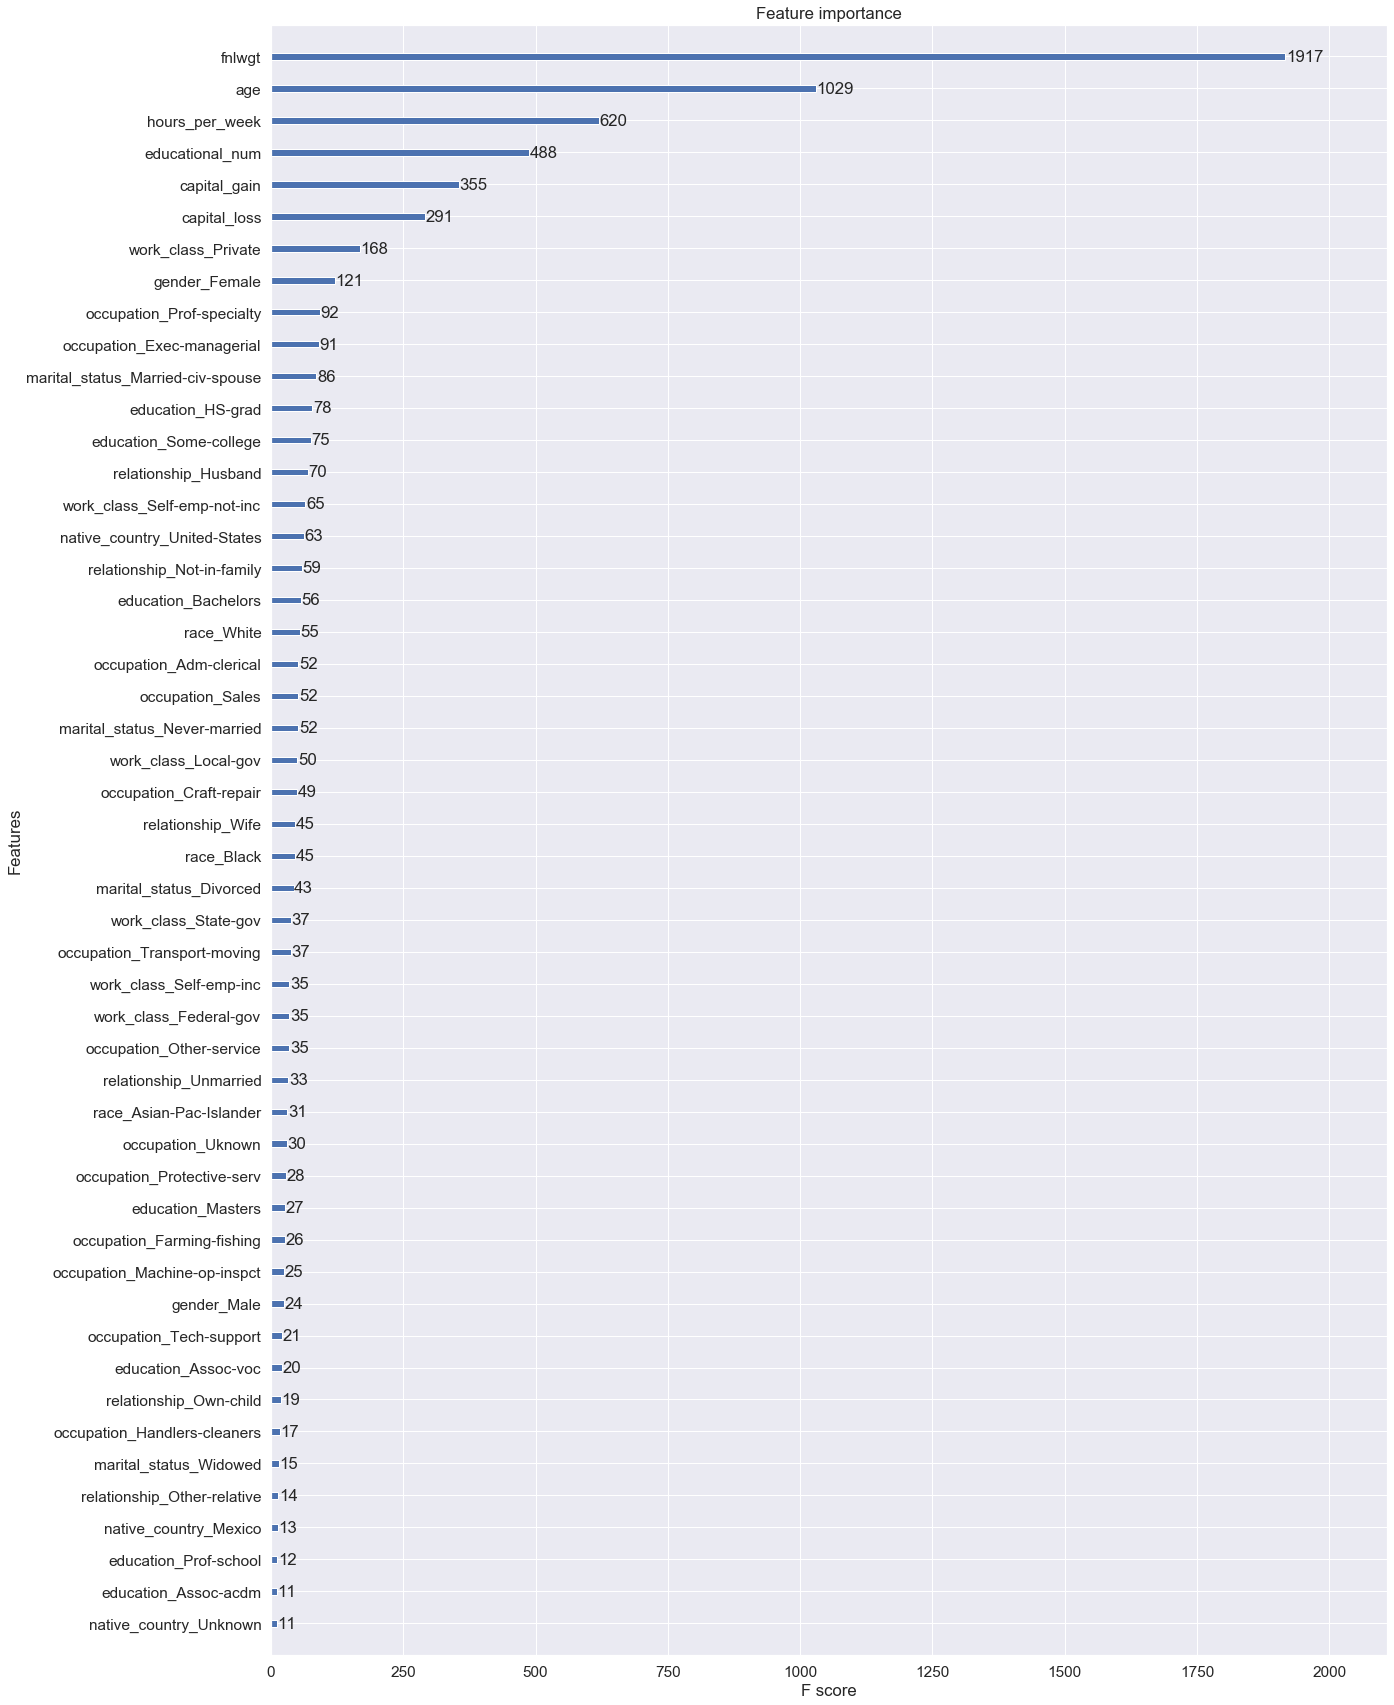

In [181]:
from xgboost import plot_importance

plt.figure(figsize=(20,30))
ax = plt.axes()
plot_importance(xgb,max_num_features=50,ax=ax)
plt.show()

In [160]:
from numpy import sort
from sklearn.feature_selection import SelectFromModel
thresholds = sort(xgb.feature_importances_)[::-1][:100:5]
print(thresholds) #Debugging
for thresh in thresholds:
    # select features using threshold
    selection = SelectFromModel(xgb, threshold=thresh, prefit=True)
    select_X_train = selection.transform(X_train_under)
    # train model
    selection_model = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0.0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.25, max_delta_step=0, max_depth=10,
              min_child_weight=3, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)
    selection_model.fit(select_X_train, y_train_under.values.ravel())
    # eval model
    select_X_test = selection.transform(X_test)
    y_pred = selection_model.predict(select_X_test)
    predictions = [round(value) for value in y_pred]
    accuracy = accuracy_score(y_test, predictions)
    print("Thresh=%.5f, n=%d, Accuracy: %.2f%%" % (thresh, select_X_train.shape[1], accuracy*100.0))

[3.9944822e-01 2.3713492e-02 1.5114336e-02 1.0040212e-02 8.8822385e-03
 6.4597712e-03 5.7293721e-03 4.8203701e-03 4.6125026e-03 4.3809614e-03
 4.0447554e-03 3.5149499e-03 3.2472734e-03 2.5002798e-03 2.0576126e-03
 9.6861512e-04 3.2868283e-04 0.0000000e+00 0.0000000e+00 0.0000000e+00]
Thresh=0.39945, n=1, Accuracy: 71.81%
Thresh=0.02371, n=6, Accuracy: 83.68%
Thresh=0.01511, n=11, Accuracy: 86.04%
Thresh=0.01004, n=16, Accuracy: 86.22%
Thresh=0.00888, n=21, Accuracy: 86.82%
Thresh=0.00646, n=26, Accuracy: 86.53%
Thresh=0.00573, n=31, Accuracy: 86.51%
Thresh=0.00482, n=36, Accuracy: 86.49%
Thresh=0.00461, n=41, Accuracy: 86.55%
Thresh=0.00438, n=46, Accuracy: 86.69%
Thresh=0.00404, n=51, Accuracy: 86.47%
Thresh=0.00351, n=56, Accuracy: 86.51%
Thresh=0.00325, n=61, Accuracy: 86.63%
Thresh=0.00250, n=66, Accuracy: 86.80%
Thresh=0.00206, n=71, Accuracy: 86.55%
Thresh=0.00097, n=76, Accuracy: 86.63%
Thresh=0.00033, n=81, Accuracy: 86.41%
Thresh=0.00000, n=107, Accuracy: 87.04%
Thresh=0.00000

In [161]:
from numpy import sort
from sklearn.feature_selection import SelectFromModel
thresholds = sort(xgb.feature_importances_)[::-1][17:25:1]
print(thresholds) # Debugging
for thresh in thresholds:
    # select features using threshold
    selection = SelectFromModel(xgb, threshold=thresh, prefit=True)
    select_X_train = selection.transform(X_train_under)
    # train model
    selection_model = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0.0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.25, max_delta_step=0, max_depth=10,
              min_child_weight=3, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)
    selection_model.fit(select_X_train, y_train_under.values.ravel())
    # eval model
    select_X_test = selection.transform(X_test)
    y_pred = selection_model.predict(select_X_test)
    predictions = [round(value) for value in y_pred]
    accuracy = accuracy_score(y_test, predictions)
    print("Thresh=%.5f, n=%d, Accuracy: %.2f%%" % (thresh, select_X_train.shape[1], accuracy*100.0))

[0.00956525 0.0090293  0.00891327 0.00888224 0.00886113 0.00858072
 0.00853448 0.00772497]
Thresh=0.00957, n=18, Accuracy: 86.53%
Thresh=0.00903, n=19, Accuracy: 86.69%
Thresh=0.00891, n=20, Accuracy: 86.84%
Thresh=0.00888, n=21, Accuracy: 86.82%
Thresh=0.00886, n=22, Accuracy: 86.76%
Thresh=0.00858, n=23, Accuracy: 86.76%
Thresh=0.00853, n=24, Accuracy: 86.59%
Thresh=0.00772, n=25, Accuracy: 86.55%


#### best model with N=20 features.... 

In [162]:
thresh = sort(xgb.feature_importances_)[::-1][19]

In [170]:
selection = SelectFromModel(xgb, threshold=thresh, prefit=True)
select_X_train = selection.transform(X_train_under)
select_X_test = selection.transform(X_test)


# train model
xgb_final = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
          colsample_bynode=1, colsample_bytree=0.7, gamma=0.0, gpu_id=-1,
          importance_type='gain', interaction_constraints='',
          learning_rate=0.25, max_delta_step=0, max_depth=10,
          min_child_weight=3, monotone_constraints='()',
          n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
          reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
          tree_method='exact', validate_parameters=1, verbosity=None)

xgb_final.fit(select_X_train, y_train_under.values.ravel())


y_pred = xgb_final.predict(select_X_test)
predictions = [round(value) for value in y_pred] 
accuracy = accuracy_score(y_test, predictions)
print(accuracy)

0.8683725690890481


Test Data Accuracy: 0.8684


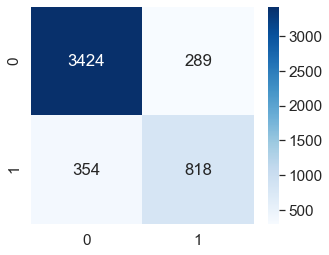

In [171]:
# Confusion Matrix

cm = confusion_matrix(y_test, y_pred) # rows = truth, cols = prediction
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))

plt.figure(figsize = (5,4))
sns.set(font_scale=1.4)

sns.heatmap(df_cm, annot=True, fmt='g', cmap="Blues")
print("Test Data Accuracy: %0.4f" % accuracy_score(y_test, y_pred))

In [172]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.92      0.91      3713
           1       0.74      0.70      0.72      1172

    accuracy                           0.87      4885
   macro avg       0.82      0.81      0.82      4885
weighted avg       0.87      0.87      0.87      4885



Result Without Hyperparamenter Tuning:
    
                precision    recall  f1-score   support

           0       0.90      0.94      0.92      3713
           1       0.78      0.67      0.72      1172

    accuracy                           0.88      4885
    macro avg      0.84      0.81      0.82      4885
    weighted avg   0.87      0.88      0.87      4885


<a id='CON'></a>
# Conclusion


Good increase in recall for '1', that is people above 50k income

* The model is predicting 70% of the people with salary above 50K accuracy
* The models is 74% of the times correct in predicting  people to have salary above 50K 

The IRS can confidently work on this model. 